<a href="https://colab.research.google.com/github/kckohkoh2/fantastic-disco/blob/master/day1018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} byted'.
          format(name=fn, length=len(uploaded[fn])))

Saving weather.csv to weather.csv
User uploaded file "weather.csv" with length 36047 byted


In [ ]:
!ls

sample_data  weather.csv


In [ ]:
data=pd.read_csv('patients.csv')
print(data)
print(type(data))

   Unnamed: 0 name  age  height    체중 혈액형
0           0  홍길동   18   188.5  72.7   A
1           1  이재명   59   172.4  75.9  AB
2           2  조영남   78   169.5  80.3   O
3           3  고경철   63   164.5  69.2   B
4           4  김남국   57   188.8  68.8   A
5           5  조규남   62   175.5  82.1   A
<class 'pandas.core.frame.DataFrame'>


In [ ]:
import pandas as pd
data=pd.read_excel('patients.xlsx')
print(data)
print(type(data))

patients.xlsx  sample_data
   Unnamed: 0 name  age  height    체중 혈액형
0           0  홍길동   18   188.5  72.7   A
1           1  이재명   59   172.4  75.9  AB
2           2  조영남   78   169.5  80.3   O
3           3  고경철   63   164.5  69.2   B
4           4  김남국   57   188.8  68.8   A
5           5  조규남   62   175.5  82.1   A
<class 'pandas.core.frame.DataFrame'>


In [ ]:
from sklearn.datasets import load_digits
digits=load_digits() #사이킷런에서 제공하는 숫자 데이터셋
print('Image data shape:',digits.data.shape)
print('lable data shape:',digits.target.shape)

Image data shape: (1797, 64)
lable data shape: (1797,)


In [ ]:
!nvidia-smi

Tue Oct 18 13:49:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

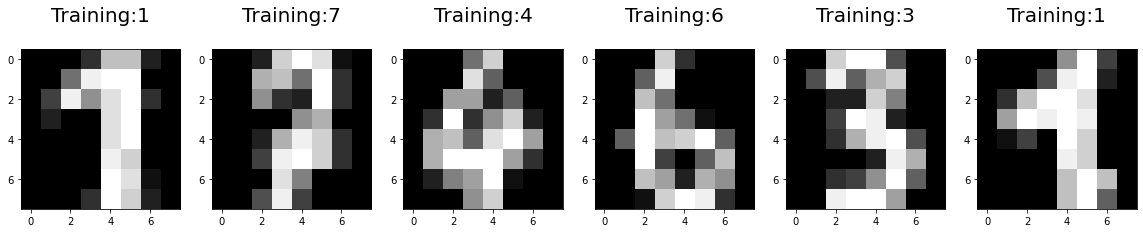

In [ ]:
import matplotlib.pyplot as plt #matplot이라는 그래프전용 패키지
import numpy as np              #수치해석 패키지 
plt.figure(figsize=(20,4))      #figure() 메써드 20 by 4의 사이즈의 그림판
for index,(image,label) in enumerate(zip(digits.data[1500:1506],digits.target[1500:1506])): #반복문 0:6슬라이싱(0~5)
    plt.subplot(1,6,index+1) #그림을 5개로 나누어 그려라 
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray) #이미지를 표시해라 
    plt.title('Training:%i\n'%label,fontsize=20)

In [ ]:
from sklearn.model_selection import train_test_split #랜덤하게 데이터셋을 Train set과 Test set으로 나누는 패키지
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,
                                               test_size=0.25,random_state=0) #사이킷런의 숫자데이터셋을 75:25비율로 랜덤 분할
from sklearn.linear_model import LogisticRegression #학습용 패키지 임포트
logisticRegr=LogisticRegression() #로지스틱 회귀모델의 인스턴스 생성

In [ ]:
logisticRegr.fit(x_train,y_train) #모델훈련

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
logisticRegr.predict(x_test[0].reshape(1,-1)) #새로운 테스트데이터에 대한 예측결과를 넘파이배열로 출력
logisticRegr.predict(x_test[10:20]) #이미지 10개에 대한 예측결과를 배열로 출력 \

array([2, 8, 6, 6, 6, 6, 1, 0, 5, 8])

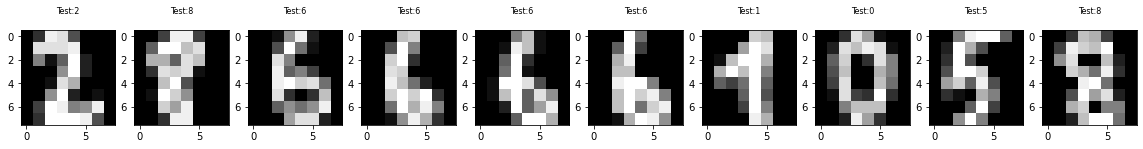

In [ ]:
plt.figure(figsize=(20,4))      #figure() 메써드 20 by 4의 사이즈의 그림판
for index,(image,label) in enumerate(zip(x_test[10:20],y_test[10:20])): #반복문 0:6슬라이싱(0~5)
    plt.subplot(1,10,index+1) #그림을 5개로 나누어 그려라 
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray) #이미지를 표시해라 
    plt.title('Test:%i\n'%label,fontsize=8)

In [ ]:
import torch
torch.__version__

'1.12.1+cu113'

In [ ]:
import torch
a=torch.tensor([[1,-1],[1,-1]])
print(a)
print(a.shape)

tensor([[ 1, -1],
        [ 1, -1]])
torch.Size([2, 2])


In [ ]:
predictions=logisticRegr.predict(x_test) #전체 테스트 이미지셋에 대한 예측 
score=logisticRegr.score(x_test,y_test) #score()메서드를 사용한 성능 측정
print(score)

0.9511111111111111


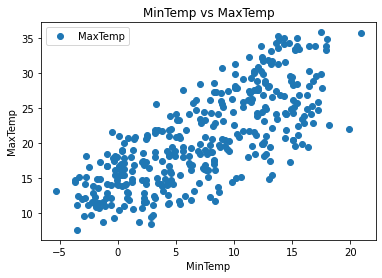

In [ ]:
import pandas as pd
dataset=pd.read_csv('weather.csv')
dataset.plot(x='MinTemp',y='MaxTemp',style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()